# Linear Discriminant Analysis (LDA)

**Objective**:
 demonstrate how LDA works.

**Assumptions**
- all features are normal distributed.
- all features are uncorrelated
- all targets displays the same covariance matrix

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

### Cenario 1 - LDA with 1 normal distribuited feature

             x         fx  y
631   9.636304  11.936059  1
159  10.917273  12.650339  1
675  12.650030  12.086639  1
351   7.273892   6.503512  0
661  -0.811369  -0.413961  0


<AxesSubplot:xlabel='fx', ylabel='Count'>

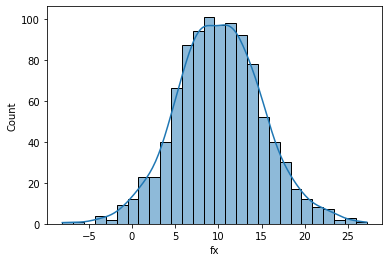

In [153]:
#feature
mean, std = 10, 5
x = np.random.normal(mean, std, 1000)

#class
#fx = b0 + b1 * x1 + error
error = np.random.normal(0, 1, 1000)
fx = x + error

y = [1 if i >= mean else 0 for i in fx]

#data with X an y
data = pd.DataFrame({'x':x, 'fx': fx,'y':y})
print(data.sample(5))

sns.histplot(data=data, x='fx', kde=True)

In [154]:
#LDA
#step 1: separate the sample by class
sample_class1 = data.loc[data['y'] == 1, 'fx']
sample_class0 = data.loc[data['y'] == 0, 'fx']


#step 2: calculate the means and probability of a random element belong to each class
mean_class1 = sample_class1.mean()
print(mean_class1)

mean_class0 = sample_class0.mean()
print(mean_class0)

prob_class1 = len(sample_class1)/len(data)
print(prob_class1)

prob_class0 = 1 - prob_class1
print(prob_class0)


#step 3: calculate std as a weighted average of sample variance for each class
sample_lda = 1/(len(data) - len(set(y))) * (sum((sample_class1 - mean_class1) ** 2) + sum((sample_class0 - mean_class0) ** 2))
print(sample_lda)


#step 4: LDA classifier
data['discriminant_fx_class1'] = data['fx'] * mean_class1/(sample_lda**2) - (mean_class1**2)/(2*(sample_lda**2)) + np.log(prob_class1)
data['discriminant_fx_class0'] = data['fx'] * mean_class0/(sample_lda**2) - (mean_class0**2)/(2*(sample_lda**2)) + np.log(prob_class0)

13.985215064842961
6.109130813509012
0.512
0.488
9.348488203746452


In [155]:
#comparing results
data['prediction_lda'] = np.where(data['discriminant_fx_class1'] > data['discriminant_fx_class0'], 1, 0)

print(confusion_matrix(data['y'], data['prediction_lda']))
print(accuracy_score(data['y'], data['prediction_lda']))
print(precision_score(data['y'], data['prediction_lda']))
print(recall_score(data['y'], data['prediction_lda']))

[[462  26]
 [  0 512]]
0.974
0.9516728624535316
1.0


<AxesSubplot:xlabel='fx', ylabel='discriminant_fx_class1'>

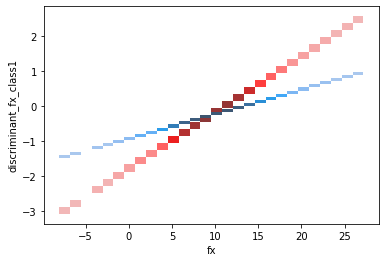

In [156]:
#graphing the probabilty
sns.histplot(data=data, x='fx', y='discriminant_fx_class1', kde=True, color='red')
sns.histplot(data=data, x='fx', y='discriminant_fx_class0', kde=True)

**Conclusion**: the predictions of LDA displayed accuracy higher than 90% in most of the executions. As we can see in the graph, each line is the probability calculated by the algorithm for every element to belong to each class, and so the prediction is based on wich line is higher. 

### Cenario 2 - LDA with 3 normal distributed and uncorrelated features

            xA         xB        xC         fx  y
973   3.488318 -16.423771  2.021025 -10.914429  0
159  13.006834  -9.618035 -3.312196   0.076603  1
727  10.243148  -6.631842 -2.998654   0.612651  1
865  14.752002 -13.727129  0.439669   1.464542  1
109  13.019529 -10.220413 -4.570590  -1.771474  0


<AxesSubplot:xlabel='value', ylabel='Count'>

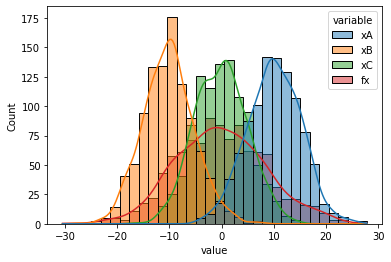

In [157]:
#feature A
meanA, stdA = 10, 5
xA = np.random.normal(meanA, stdA, 1000)


#feature B
meanB, stdB = -10, 5
xB = np.random.normal(meanB, stdB, 1000)


#feature C
meanC, stdC = 0, 5
xC = np.random.normal(meanC, stdC, 1000)

fx = xA + xB + xC

y = [1 if i >= fx.mean() else 0 for i in fx]
#y = [1 if i >= (meanA + meanB + meanC) else 0 for i in fx]

#data with X an y
data = pd.DataFrame({'xA':xA, 'xB':xB, 'xC':xC, 'fx': fx, 'y':y})
print(data.sample(5))

sns.histplot(data=pd.melt(data, id_vars=['y'], value_vars=['xA', 'xB', 'xC', 'fx']), x='value', hue='variable', kde=True)

In [158]:
#splitting the classes and checking covariance matrix
sample_class1 = data.loc[data['y'] == 1][['xA', 'xB', 'xC']]
sample_class0 = data.loc[data['y'] == 0][['xA', 'xB', 'xC']]

cov_class1 = sample_class1.cov()
print(cov_class1)

cov_class0 = sample_class0.cov()
print(cov_class0)

           xA         xB         xC
xA  19.015594  -5.307552  -4.549110
xB  -5.307552  19.966537  -6.237785
xC  -4.549110  -6.237785  21.779837
           xA         xB         xC
xA  21.072101  -4.409867  -6.782566
xB  -4.409867  16.956349  -5.089442
xC  -6.782566  -5.089442  19.300131


One of the assumptions require for LDA is that every sample conditional to each class should have equal covariance matrix. The number above shows that some difference exists, although, it seems irrelevant.

In [159]:
#LDA
#step 1: already done
#step 2: calculate the means and probability of a random element belong to each class
mean_class1 = np.array(sample_class1.mean()).reshape(3,1)
mean_class1_t = mean_class1.reshape(1,3)
print(mean_class1)

mean_class0 = np.array(sample_class0.mean()).reshape(3,1)
mean_class0_t = mean_class0.reshape(1,3)
print(mean_class0)


ln_prob_class1 = np.log(len(sample_class1)/len(data))
print(ln_prob_class1)

ln_prob_class0 = np.log(len(sample_class0)/len(data))
print(ln_prob_class0)


#step 3: calculate inverse covariance of each sample
inv_cov_class1 = np.linalg.inv(np.array(cov_class1))
print(inv_cov_class1)

inv_cov_class0 = np.linalg.inv(np.array(cov_class0))
print(inv_cov_class0)

[[12.55952185]
 [-7.77736546]
 [ 2.08887376]]
[[  7.74318454]
 [-12.43036859]
 [ -2.16487183]]
-0.715392789507265
-0.6713856887784326
[[0.06384955 0.02321629 0.01998531]
 [0.02321629 0.06344709 0.0230205 ]
 [0.01998531 0.0230205  0.05668143]]
[[0.06162216 0.02446228 0.02810632]
 [0.02446228 0.07375485 0.02804583]
 [0.02810632 0.02804583 0.06908609]]


LDA decision function equation:

<img src="img/lda_equation.PNG" />

*source: https://arxiv.org/pdf/1906.02590.pdf*

In [160]:
#step 4: create decision functions
X = data[['xA', 'xB', 'xC']]
y = data['y']
decision_fx_class1 = []
decision_fx_class0 = []

for i in range(len(X)):
    #assigning x row for row 
    x = np.array(X.loc[i]).reshape(3, 1)
    x_t = x.reshape(1, 3)

    #decision function class 1
    fx1 = -0.5 * np.matmul(np.matmul(x_t, inv_cov_class1), x) \
          -0.5 * np.matmul(np.matmul(mean_class1_t, inv_cov_class1), mean_class1) \
          + np.matmul(np.matmul(mean_class1_t, inv_cov_class1), x) \
          + ln_prob_class1  

    #decision function class 0
    fx0 = -0.5 * np.matmul(np.matmul(x_t, inv_cov_class0), x) \
          -0.5 * np.matmul(np.matmul(mean_class0_t, inv_cov_class0), mean_class0) \
          + np.matmul(np.matmul(mean_class0_t, inv_cov_class0), x) \
          + ln_prob_class0  

    decision_fx_class1.append(np.asscalar(fx1))
    decision_fx_class0.append(np.asscalar(fx0))

data['fx1_manual'] = decision_fx_class1
data['fx0_manual'] = decision_fx_class0
data['fx1_minus_fx0_manual'] = data['fx1_manual'] - data['fx0_manual']
data['prediction_manual'] = np.where(data['fx1_minus_fx0_manual'] >= 0, 1, 0)

C:\Users\Kenji\AppData\Local\Temp\ipykernel_7068\2463327473.py:24: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  decision_fx_class1.append(np.asscalar(fx1))
C:\Users\Kenji\AppData\Local\Temp\ipykernel_7068\2463327473.py:25: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  decision_fx_class0.append(np.asscalar(fx0))


In [161]:
#comparing the results
print(confusion_matrix(data['y'], data['prediction_manual']))
print(accuracy_score(data['y'], data['prediction_manual']))
print(precision_score(data['y'], data['prediction_manual']))
print(recall_score(data['y'], data['prediction_manual']))

[[500  11]
 [  3 486]]
0.986
0.9778672032193159
0.9938650306748467


In [162]:
#check with scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = data[['xA', 'xB', 'xC']]
y = data['y']

lda = LinearDiscriminantAnalysis(solver='lsqr').fit(X, y)
lda.predict(X).tolist()

data['fx1_sklearn'] = lda.predict_log_proba(X)[:,1]
data['fx0_sklearn'] = lda.predict_log_proba(X)[:,0]
data['fx1_minus_fx0_sklearn'] = lda.decision_function(X)
data['prediction_sklearn'] = lda.predict(X).tolist()

In [163]:
#comparing the results
print(confusion_matrix(data['y'], data['prediction_sklearn']))
print(accuracy_score(data['y'], data['prediction_sklearn']))
print(precision_score(data['y'], data['prediction_sklearn']))
print(recall_score(data['y'], data['prediction_sklearn']))

[[510   1]
 [ 12 477]]
0.987
0.997907949790795
0.9754601226993865


Problema: a fórmula do livro não é diferente da fórmula do sklearn. Adicionalmente, vi alguns artigos e vídeos no youtube que utilizam a mesma fórmula do sklearn, e não do livro.

https://www.youtube.com/watch?v=4buOoXp7AyI
https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda-math

In [164]:
#LDA
#step 1: separate the sample by class
sample_class1 = data.loc[data['y'] == 1][['xA', 'xB', 'xC']]
sample_class0 = data.loc[data['y'] == 0][['xA', 'xB', 'xC']]

#step 2: calculate the means and probability of a random element belong to each class
mean_class1 = pd.DataFrame({'mean_class1': sample_class1.mean()})
print(mean_class1)

mean_class0 = pd.DataFrame({'mean_class0': sample_class0.mean()})
print(mean_class0)

prob_class1 = len(sample_class1)/len(data)
print(prob_class1)

prob_class0 = 1 - prob_class1
print(prob_class0)


#step 3: calculate std as a weighted average of sample variance for each class
X = data[['xA', 'xB', 'xC']]
X_corr = X.corr()
X_cov = X.cov()

#step 4: LDA classifier
pred_class1 = np.matmul(np.matmul(X, np.linalg.inv(X_cov)), mean_class1) - (0.5 * np.matmul(np.matmul(mean_class1.T, np.linalg.inv(X_cov)), mean_class1)).loc['mean_class1', 0] + np.log(prob_class1)
pred_class0 = np.matmul(np.matmul(X, np.linalg.inv(X_cov)), mean_class0) - (0.5 * np.matmul(np.matmul(mean_class0.T, np.linalg.inv(X_cov)), mean_class0)).loc['mean_class0', 0] + np.log(prob_class0)

    mean_class1
xA    12.559522
xB    -7.777365
xC     2.088874
    mean_class0
xA     7.743185
xB   -12.430369
xC    -2.164872
0.489
0.511


C:\Users\Kenji\AppData\Local\Temp\ipykernel_7068\3045497164.py:26: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  pred_class1 = np.matmul(np.matmul(X, np.linalg.inv(X_cov)), mean_class1) - (0.5 * np.matmul(np.matmul(mean_class1.T, np.linalg.inv(X_cov)), mean_class1)).loc['mean_class1', 0] + np.log(prob_class1)
C:\Users\Kenji\AppData\Local\Temp\ipykernel_7068\3045497164.py:27: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes 

In [170]:
#graphing the probabilty (probably wrong)
sns.histplot(data=data, x='fx', y='fx1_sklearn', kde=True, color='red')
sns.histplot(data=data, x='fx', y='fx0_sklearn', kde=True)

ValueError: Could not interpret value `fx1_sklearn` for parameter `y`

The same visualization used with only 1 feature is not as insightful when increasing the number of features to 3..

In [167]:
import plotly.express as px

fig = px.scatter_3d(data,
                    x='xA' , y='xB', z='xC', color='prediction_lda')
fig.show()

<img src="img/lda_equation_sklearn.PNG" />

In [168]:
#check with scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X, y)
lda.predict(X).tolist()

data['prediction_sklearn'] = lda.predict(X).tolist()
data['prob1_sklearn'] = lda.predict_log_proba(X)[:,1]
data['prob0_sklearn'] = lda.predict_log_proba(X)[:,0]


#cases of divergence (why?)
data.loc[data['prediction_lda'] != data['prediction_sklearn']]
data.head(3)

,xA,xB,xC,fx,y,fx1_manual,fx0_manual,fx1_minus_fx0_manual,prediction_manual,fx1_sklearn,fx0_sklearn,fx1_minus_fx0_sklearn,prediction_sklearn,discriminant_fx_class1,discriminant_fx_class0,prediction_lda,prob1_sklearn,prob0_sklearn
0,4.490446,-2.707937,0.595027,2.377537,1,-2.789418,-4.472983,1.683564,1,-0.226398,-1.596524,1.370126,1,-2.045597,-2.510410,1,-0.226972,-1.594269
1,14.287843,-13.557712,-7.017522,-6.287390,0,-4.886183,-1.931714,-2.954470,0,-3.311659,-0.037137,-3.274522,0,5.869786,7.076167,0,-3.305434,-0.037373
2,5.389069,-13.600318,-2.062563,-10.273812,0,-6.041656,-0.950223,-5.091434,0,-5.392046,-0.004563,-5.387483,0,1.877131,3.843779,0,-5.381408,-0.004612


### Cenario 3 - LDA with 2 normal distributed and high correlated features

           xA         xB        xC         fx  y
511 -9.045729 -10.625362 -2.141859 -19.671091  0
939  8.538016   9.555599 -0.259486  18.093615  1
646  6.622878   5.245244 -0.226406  11.868122  1
196  4.812942   5.083091  3.638488   9.896034  1
897  6.431495   6.570201 -7.212853  13.001696  1


<AxesSubplot:xlabel='value', ylabel='Count'>

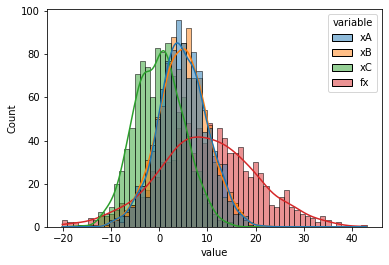

In [169]:
#feature A
meanA, stdA = 5, 5
xA = np.random.normal(meanA, stdA, 1000)


#feature B
meanB, stdB = 0, 1
xB = xA + np.random.normal(meanB, stdB, 1000)

#class
fx = xA + xB

y = [1 if i >= (meanA + meanB) else 0 for i in fx]

#data with X an y
data = pd.DataFrame({'xA':xA, 'xB':xB, 'xC':xC, 'fx': fx, 'y':y})
print(data.sample(5))

sns.histplot(data=pd.melt(data, id_vars=['y'], value_vars=['xA', 'xB', 'xC', 'fx']), x='value', hue='variable', kde=True)

### Cenario 3 - LDA with 1 non-normal distribuited feature and 1 class 

### Cenario 4 - LDA with 1 normal distribuited feature and 1 multi-class 